# 60171100 윤민혁 
- 과제 2 : 와인 품질 모델

# 데이터셋 로딩

In [3]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv('data/winequality-red.csv')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 데이터 전처리

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'] = df.quality.map({3:0,4:0,5:0,6:1,7:1,8:1})
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [7]:
X = np.array(df.iloc[:,:-1])
y = np.array(df['quality'])

In [8]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [9]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# 모델 적합

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
print('X_train크기:',X_train.shape)
print('y_train크기:', y_train.shape)
print('X_test크기:', X_test.shape)
print('y_test크기:', y_test.shape)

X_train크기: (1119, 11)
y_train크기: (1119,)
X_test크기: (480, 11)
y_test크기: (480,)


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

# 모델성능평가

In [12]:
temp_y_pred = tree.predict(X_test)
#Training값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0
 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
실제값
 [1 0 1 1 0 1 0 1

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)

print('정확도',format(temp_acc))

정확도 0.7


In [14]:
print(confusion_matrix(y_test, temp_y_pred))

[[151  75]
 [ 69 185]]


In [15]:
print(classification_report((tree.predict(X_test)>0.5).astype('int16'),y_test))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       220
           1       0.73      0.71      0.72       260

    accuracy                           0.70       480
   macro avg       0.70      0.70      0.70       480
weighted avg       0.70      0.70      0.70       480



# 6주차 과제
- 60171100 윤민혁
- 와인 분류 모델

In [16]:
train_scores, test_scores = list(), list()

In [17]:
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth = i)
    DT1.fit(X_train, y_train)
    
    #training dataset 정확도 증가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #Train정확도와 Test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' %(i,train_acc, test_acc))

>1, train: 0.699, test: 0.717
>2, train: 0.699, test: 0.717
>3, train: 0.752, test: 0.690
>4, train: 0.767, test: 0.700
>5, train: 0.804, test: 0.721
>6, train: 0.849, test: 0.713
>7, train: 0.886, test: 0.721
>8, train: 0.916, test: 0.710
>9, train: 0.943, test: 0.727
>10, train: 0.970, test: 0.723
>11, train: 0.984, test: 0.733
>12, train: 0.992, test: 0.721
>13, train: 0.996, test: 0.729
>14, train: 0.998, test: 0.733
>15, train: 1.000, test: 0.706
>16, train: 1.000, test: 0.731
>17, train: 1.000, test: 0.731
>18, train: 1.000, test: 0.717
>19, train: 1.000, test: 0.731


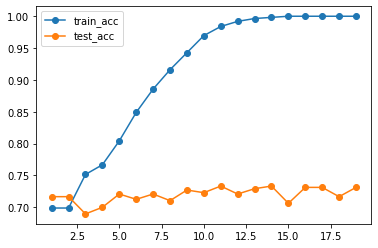

In [18]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label = 'train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label = 'test_acc')
pyplot.legend()
pyplot.show()

- max depth = 4로 설정했습니다

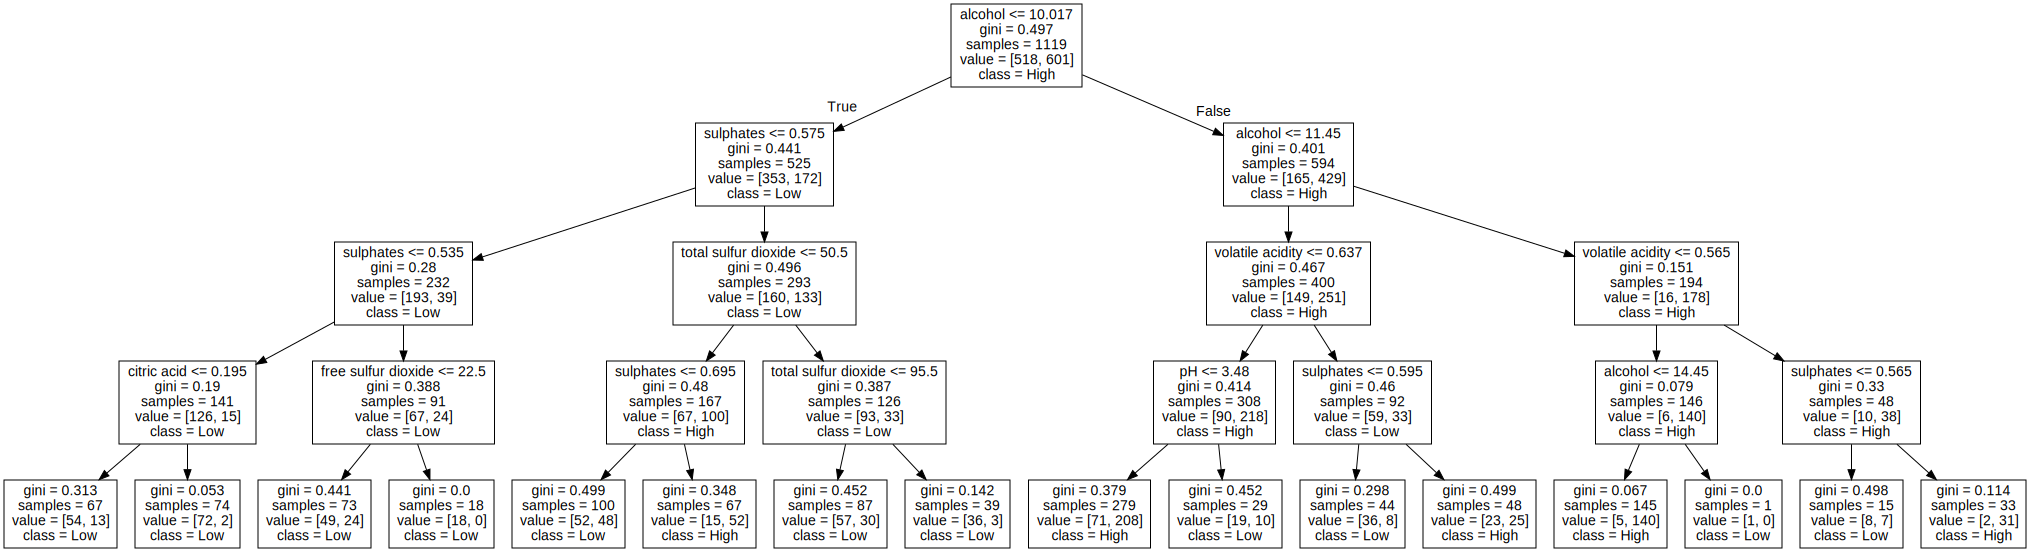

In [19]:
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train,y_train)

feature_neme = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
                'total sulfur dioxide','density','pH','sulphates','alcohol']
tree.graph = export_graphviz(tree, feature_names=feature_neme,
                       class_names=['Low','High'])
graphviz.Source(tree.graph)

- alchol이 10.525 초과이고 volatile acidity가 0.425이하면 high class이다.
- alchol이 10.525 이하이고 fixed acidity가 14.65 이하고 residual sugar가 1.55초과면 middle class이다.

# 8주차 과제
- 60171100 윤민혁

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision:', precision_score(y_test, temp_y_pred))
print('recall:', recall_score(y_test, temp_y_pred))
print('f1:', f1_score(y_test, temp_y_pred))

accuracy : 0.7
precision: 0.7115384615384616
recall: 0.7283464566929134
f1: 0.7198443579766537


In [21]:
tree.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [22]:
tree.predict_proba(X_test)[:,1]

array([0.74551971, 0.19402985, 0.96551724, 0.02702703, 0.74551971,
       0.34482759, 0.48      , 0.74551971, 0.19402985, 0.34482759,
       0.02702703, 0.52083333, 0.74551971, 0.93939394, 0.34482759,
       0.74551971, 0.96551724, 0.74551971, 0.46666667, 0.19402985,
       0.93939394, 0.48      , 0.74551971, 0.96551724, 0.48      ,
       0.02702703, 0.32876712, 0.96551724, 0.        , 0.96551724,
       0.74551971, 0.74551971, 0.34482759, 0.7761194 , 0.46666667,
       0.74551971, 0.34482759, 0.7761194 , 0.96551724, 0.74551971,
       0.        , 0.74551971, 0.96551724, 0.96551724, 0.74551971,
       0.02702703, 0.32876712, 0.74551971, 0.34482759, 0.74551971,
       0.32876712, 0.32876712, 0.74551971, 0.96551724, 0.48      ,
       0.74551971, 0.07692308, 0.32876712, 0.96551724, 0.7761194 ,
       0.7761194 , 0.74551971, 0.74551971, 0.96551724, 0.32876712,
       0.74551971, 0.18181818, 0.52083333, 0.74551971, 0.96551724,
       0.52083333, 0.34482759, 0.19402985, 0.74551971, 0.74551

In [23]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

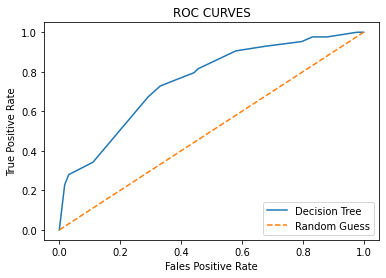

In [24]:
plt.plot(fpr, tpr, '-', ms = 2, label = "Decision Tree")
plt.plot([0,1],[0,1],'--', label = "Random Guess")

plt.xlabel('Fales Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc = 'lower right')
plt.show()

In [25]:
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Cureve : %0.2f' %roc_auc)

Area Under Cureve : 0.75


In [26]:
def predict_quality():
    data = []
    data.append(float(input('fixed acidity: ')))
    data.append(float(input('volatile acidity: ')))
    data.append(float(input('citric acid: ')))
    data.append(float(input('residual sugar: ')))
    data.append(float(input('chlorides: ')))
    data.append(float(input('free sulfur dioxide:')))
    data.append(float(input('total sulfur dioxide:')))
    data.append(float(input('density: ')))
    data.append(float(input('pH: ')))
    data.append(float(input('sulphates: ')))
    data.append(float(input('alcohol: ')))
    result = tree.predict([data])
    if result ==1:
        print('좋은 품질의 와인')
    else:
        print('좋지 못한 품질의 와인')
predict_quality()

fixed acidity: 1
volatile acidity: 1
citric acid: 1
residual sugar: 1
chlorides: 1
free sulfur dioxide:1
total sulfur dioxide:1
density: 1
pH: 1
sulphates: 1
alcohol: 1
좋은 품질의 와인


## 60171100 윤민혁
- 9주차 과제

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [28]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [30]:
temp_acc_rf = accuracy_score(y_test, temp_y_pred_rf)
print(format(temp_acc_rf))

0.7791666666666667


In [31]:
scores = []
for i in range(10,301,5):
    RF = RandomForestClassifier(n_estimators=i,random_state=0)
    RF.fit(X_train,y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc:%0.3f' %(i,acc))

>10, acc:0.760
>15, acc:0.781
>20, acc:0.775
>25, acc:0.777
>30, acc:0.785
>35, acc:0.779
>40, acc:0.785
>45, acc:0.777
>50, acc:0.779
>55, acc:0.785
>60, acc:0.783
>65, acc:0.779
>70, acc:0.779
>75, acc:0.785
>80, acc:0.783
>85, acc:0.785
>90, acc:0.783
>95, acc:0.783
>100, acc:0.779
>105, acc:0.783
>110, acc:0.785
>115, acc:0.783
>120, acc:0.787
>125, acc:0.787
>130, acc:0.790
>135, acc:0.790
>140, acc:0.787
>145, acc:0.790
>150, acc:0.792
>155, acc:0.794
>160, acc:0.796
>165, acc:0.798
>170, acc:0.800
>175, acc:0.802
>180, acc:0.798
>185, acc:0.800
>190, acc:0.792
>195, acc:0.792
>200, acc:0.792
>205, acc:0.798
>210, acc:0.796
>215, acc:0.787
>220, acc:0.790
>225, acc:0.790
>230, acc:0.783
>235, acc:0.790
>240, acc:0.792
>245, acc:0.794
>250, acc:0.796
>255, acc:0.794
>260, acc:0.792
>265, acc:0.792
>270, acc:0.794
>275, acc:0.794
>280, acc:0.796
>285, acc:0.796
>290, acc:0.794
>295, acc:0.794
>300, acc:0.794


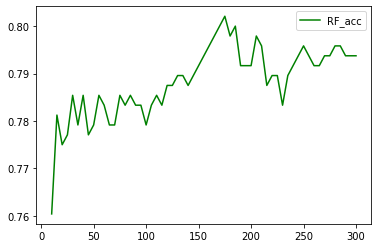

In [32]:
pyplot.plot(range(10,301,5), scores, 'g-', label = 'RF_acc')
pyplot.legend()

In [33]:
print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision:', precision_score(y_test, temp_y_pred))
print('recall:', recall_score(y_test, temp_y_pred))
print('f1:', f1_score(y_test, temp_y_pred))

accuracy : 0.7
precision: 0.7115384615384616
recall: 0.7283464566929134
f1: 0.7198443579766537


In [34]:
RF = RandomForestClassifier(n_estimators=175, random_state=0)
RF.fit(X_train,y_train)
temp_y_pred_rf = RF.predict(X_test)

In [35]:
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision:', precision_score(y_test, temp_y_pred_rf))
print('recall:', recall_score(y_test, temp_y_pred_rf))
print('f1:', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.8020833333333334
precision: 0.806949806949807
recall: 0.8228346456692913
f1: 0.8148148148148149


In [37]:
from sklearn.metrics import roc_curve  

In [42]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc_DT = metrics.auc(fpr1,tpr1)
roc_auc_RF = metrics.auc(fpr2, tpr2)

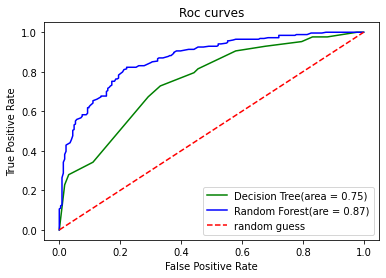

In [43]:
plt.plot(fpr1, tpr1,'g-',label = 'Decision Tree(area = %0.2f)'%roc_auc_DT)
plt.plot(fpr2, tpr2 ,'b-', label = 'Random Forest(are = %0.2f)' %roc_auc_RF)
plt.plot([0,1],[0,1], 'r--', label= 'random guess')


plt.title('Roc curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

- Decision Tree보다 Random Forest가 정확도, 정밀도, 재현율, f1에서 더 높은 수치가 나왔고 auc도 약 0.12정도 높게 나온 것을 확인했다.